In [1]:
from __future__ import print_function, division
import sys
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob

from music21 import converter, instrument, note, chord, stream, environment, corpus
from keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import np_utils
print("Imports done")


Using TensorFlow backend.
C:\Users\teres\Anaconda3\envs\py3-TF1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\teres\Anaconda3\envs\py3-TF1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\teres\Anaconda3\envs\py3-TF1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\teres\Anaconda3\envs\py

Imports done


In [ ]:
midi = converter.parse('love_simplepiano/as_time_goes_by_casablanca_simplepiano.mid')
print("part objects in midi:",len(midi))
print(midi[1].__class__)
print("0",len(midi[0]))
print("1",len(midi[1]))

for n in midi[1]:
    print(n, n.__class__.__name__)
print("---")

for i in range(0, len(midi)):
    midi[i] = midi[i].flat.chordify()
    
#midi[0].show('text')
print(len(midi[0]))

notes_to_parse = None
notes=[]

s2 = instrument.partitionByInstrument(midi)
for e in s2:
    print(e)
#notes_to_parse = s2.parts[0].recurse() 

s2.notes.show('musicxml')


part objects in midi: 3
<class 'music21.stream.Part'>
0 7
1 4
A major Key
<music21.stream.Voice 0x2a165cd8ac8> Voice
<music21.stream.Voice 0x2a167ac3388> Voice
<music21.stream.Voice 0x2a167caf508> Voice
---
4
<music21.stream.Part Piano>


In [239]:
#spielwiese

print("class is %s" % midi.__class__.__name__)

print("0",len(midi[0]))
print("1", len(midi[1]))
print("2",len(midi[2]))
print("3",len(midi[3]))
print("4",len(midi[4]))
print("5",len(midi[5]))
print("---")
for n in midi[3]:
    print(n, n.__class__.__name__)
print("---")
print(len(midi[4][4]))
for b in midi[4][4]:
    print(b, b.__class__.__name__)





class is Score
0 9
1 94
2 519
3 173
4 8
5 31
---
Acoustic Bass AcousticBass
C major Key
<music21.meter.TimeSignature 3/4> TimeSignature
<music21.note.Rest rest> Rest
<music21.note.Note C> Note
<music21.note.Rest rest> Rest
<music21.note.Note A> Note
<music21.note.Rest rest> Rest
<music21.note.Note D> Note
<music21.note.Note G> Note
<music21.note.Note C> Note
<music21.note.Note C> Note
<music21.note.Note B> Note
<music21.note.Note A> Note
<music21.note.Note D> Note
<music21.note.Note G> Note
<music21.note.Note C> Note
<music21.note.Note C> Note
<music21.note.Note F> Note
<music21.note.Note F> Note
<music21.note.Note C> Note
<music21.note.Rest rest> Rest
<music21.note.Note B> Note
<music21.note.Note A> Note
<music21.note.Rest rest> Rest
<music21.note.Note G> Note
<music21.note.Note F> Note
<music21.note.Note F> Note
<music21.note.Note G> Note
<music21.note.Rest rest> Rest
<music21.note.Note G> Note
<music21.note.Rest rest> Rest
<music21.note.Note C> Note
<music21.note.Note E> Note
<music

In [45]:
#modificated def get_notes() Code
midi = converter.parse("love_obpi\As_Time_Goes_By_obpi.mid")

notes_to_parse = None

try: # file has instrument parts
    s2 = instrument.partitionByInstrument(midi)
    print(len(s2))
    s2.parts[0].show('text')
    s2.parts[0].show('musicxml')
    print("---")
    notes_to_parse = s2.parts[0].recurse()
    print("note to parse", len(notes_to_parse))
except: # file has notes in a flat structure
    notes_to_parse = midi.flat.notes
    

for element in notes_to_parse:
    if isinstance(element, note.Note):
        print(element.pitch)
        notes.append(str(element.pitch))
       # print("appending %s" %file)
    elif isinstance(element, chord.Chord):
        print("is chord:")
        for n in element.normalOrder:
            print(n)
        notes.append('.'.join(str(n) for n in element.normalOrder))

2
{0.0} <music21.instrument.Oboe 'Oboe'>
{0.0} <music21.tempo.MetronomeMark animato Quarter=120.0>
{0.0} <music21.key.Key of A major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note G#>
{0.0} <music21.note.Rest rest>
{3.0} <music21.note.Note F#>
{3.5} <music21.note.Note F#>
{4.5} <music21.note.Note E>
{6.0} <music21.note.Note G#>
{6.0} <music21.note.Rest rest>
{6.5} <music21.note.Note C#>
{7.0} <music21.note.Note E>
{7.5} <music21.note.Note C#>
{8.0} <music21.note.Note D>
{8.0} <music21.note.Note B>
{11.0} <music21.note.Note B>
{11.25} <music21.note.Note C#>
{11.5} <music21.note.Note E>
{14.0} <music21.note.Note C#>
{14.5} <music21.note.Note E>
{15.0} <music21.note.Note F#>
{15.5} <music21.note.Note F#>
{16.0} <music21.note.Note G>
{16.0} <music21.note.Note G#>
{17.0} <music21.note.Note E>
{18.0} <music21.note.Note F#>
{18.5} <music21.note.Note E>
{19.5} <music21.note.Note E>
{20.5} <music21.note.Note C#>
{21.0} <music21.note.Note B>
{21.5} <music21.note.Note C#>
{22.5

In [46]:
#originally def get_notes() code in GAN
notes = []
for file in glob.glob("love_obpi/*.mid"):
    midi = converter.parse(file)

    print("Parsing %s" % file)

    notes_to_parse = None

    try: # file has instrument parts
        s2 = instrument.partitionByInstrument(midi)
        notes_to_parse = s2.parts[0].recurse() 
    except: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes
            
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))

   # return notes

Parsing love_obpi\Advance_To_The_Rear_obpi.mid
Parsing love_obpi\All_Out_Of_Love_obpi.mid
Parsing love_obpi\As_Time_Goes_By_obpi.mid
Parsing love_obpi\Dr_Zhivago_obpi.mid
Parsing love_obpi\Legends_Of_The_Fall_obpi.mid
Parsing love_obpi\Out_Of_Africa_obpi.mid


In [47]:
print(len(notes))
for n in notes:
    print(n)

1061
G5
E5
D5
C5
F5
D5
C5
B4
G4
0.4
2.5
4.7
0.4
2.5
4.7
5.9
2.5
0.4
11.2
7.11
C5
E4
2.5
E5
G4
2.5
0.4
2.5
4.7
5.9
2.5
0.4
11.2
4.7
7.0
G5
C5
7.0
7.10
4.7
7.10
5.9
F5
A4
F5
2.5
4.7
5.11
7.0
0.4
D5
E4
4.7
2.5
4.7
5.9
7.11
9.0
7.11
5.11
0.4
G5
E5
F5
E5
D5
C5
D5
E5
F5
D5
C5
B4
C5
D5
E5
C5
D5
C5
B4
A4
B4
C5
D5
B4
C5
B4
A4
G4
G4
G5
E5
F5
E5
D5
C5
D5
E5
F5
D5
C5
B4
G4
G4
A4
B4
C5
B4
G4
D5
C5
E4
C5
2.5
4.7
0.4
2.5
4.7
5.9
2.5
0.4
11.2
7.11
C5
E4
2.5
4.7
2.5
0.4
2.5
4.7
5.9
2.5
0.4
0.3
8.0
8.0
5.8
3.6
1.5
3.6
5.8
6.10
3.6
1.5
0.3
1.5
3.6
5.8
1.5
0.3
10.1
0.3
1.5
3.6
C5
E-4
10.1
G#4
C4
E-4
8.0
8.1
5.8
3.6
1.5
3.6
5.8
6.10
3.6
1.5
0.3
8.0
8.0
10.1
6.10
1.5
0.3
8.0
3.6
1.5
9.1
2.6
4.7
6.9
2.6
4.7
6.9
7.11
4.7
2.6
1.4
9.1
D5
F#4
4.7
6.9
4.7
2.6
4.7
6.9
7.11
4.7
2.6
1.4
6.9
9.2
A5
D5
9.2
9.0
2.6
9.0
7.11
7.11
7.11
4.10
6.9
1.7
9.2
2.6
4.7
6.9
4.7
6.9
7.11
9.1
11.2
9.1
1.7
2.6
2.7
2.6
B-3
C4
F3
F4
C4
B-3
B-3
C4
F3
B-2
B-3
E-3
E-3
C4
B-3
F3
3.5.7
B-3
D4
D4
B-3
F3
B-2
B-2
3.7.10
C4
E-3
D4
F3
B-3
B-3
C4

In [48]:
#originally def prepare_sequences(notes, n_vocab):

#set number of vocabs to the number of different notes found in the corpus
n_vocab = len(set(notes))

#""" Prepare the sequences used by the Neural Network """
sequence_length = 100

# Get all pitch names
pitchnames = sorted(set(item for item in notes))

# Create a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

network_input = []
network_output = []

# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]
    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])

n_patterns = len(network_input)

# Reshape the input into a format compatible with LSTM layers
network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
    
# Normalize input between -1 and 1
network_input = (network_input - float(n_vocab)/2) / (float(n_vocab)/2)
network_output = np_utils.to_categorical(network_output)

   # return (network_input, network_output)
X_train, y_train = network_input, network_output



In [49]:
#initialize GAN

class GAN():
    def __init__(self, rows):
        self.seq_length = rows
        self.seq_shape = (self.seq_length, 1)
        self.latent_dim = 1000
        self.disc_loss = []
        self.gen_loss =[]
        
        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates note sequences
        z = Input(shape=(self.latent_dim,))
        generated_seq = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(generated_seq)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
    def build_discriminator(self):

        model = Sequential()
        model.add(LSTM(512, input_shape=self.seq_shape, return_sequences=True))
        model.add(Bidirectional(LSTM(512)))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        seq = Input(shape=self.seq_shape)
        validity = model(seq)

        return Model(seq, validity)
    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.seq_shape), activation='tanh'))
        model.add(Reshape(self.seq_shape))
        model.summary()
        
        noise = Input(shape=(self.latent_dim,))
        seq = model(noise)

        return Model(noise, seq)
        
gan = GAN(rows=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 512)          1052672   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [50]:
#orginally GAN .def train(self, epochs, batch_size=128, sample_interval=50):

self = gan
epochs = 2 #5000
batch_size=32
sample_interval=1

# 1. Load and convert the data (notes, n_vocab, X_train, y_train) above

# 2. Define adversarial ground truths
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))
        
# 3. Training the model
for epoch in range(epochs):

    # 3a. Training the discriminator
    # Select a random batch of note sequences
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_seqs = X_train[idx]

    #noise = np.random.choice(range(484), (batch_size, self.latent_dim))
    #noise = (noise-242)/242 #484 und 242 sind für das alte Projekt spezifisch nicht für mich
    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

    # Generate a batch of new note sequences
    gen_seqs = self.generator.predict(noise)

    # Train the discriminator
    d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
    d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


    # 3b. Training the Generator
    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

    # Train the generator (to have the discriminator label samples as real)
    g_loss = self.combined.train_on_batch(noise, real)

    # Print the progress and save into loss lists
    if epoch % sample_interval == 0:
      print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
      self.disc_loss.append(d_loss[0])
      self.gen_loss.append(g_loss)

C:\Users\teres\Anaconda3\envs\py3-TF1.14\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\teres\Anaconda3\envs\py3-TF1.14\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.698110, acc.: 3.12%] [G loss: 0.690569]


C:\Users\teres\Anaconda3\envs\py3-TF1.14\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.683749, acc.: 54.69%] [G loss: 0.687927]


In [51]:
    #originally GAN. def generate(self, input_notes):
# Get pitch names and store in a dictionary
pitchnames = sorted(set(item for item in notes))
num_pitches = len(pitchnames)
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
##############
print("num_pitches: %d" % len(pitchnames))
#############

# Use random noise to generate sequences
noise = np.random.normal(0, 1, (1, self.latent_dim))
predictions = self.generator.predict(noise)
##############
# model.predict() aus Keras API: Generates output predictions for the input samples.
# input here: noise
# output: Numpy array(s) of predictions.
# len(predictions[0]) = 100
##############

# Turn noise vector into predicted notes und chords
pred_notes = [x * (int(num_pitches / 2)) + (num_pitches / 2) for x in predictions[0]]  # *242+242
##############
print("pred_notes before:")
print(pred_notes)
##############
pred_notes = [int_to_note[int(x)] for x in pred_notes]
##############
print("pred_notes after:")
print(pred_notes)
##############

num_pitches: 86
pred_notes before:
[array([59.26808], dtype=float32), array([35.547676], dtype=float32), array([42.992], dtype=float32), array([59.432663], dtype=float32), array([39.870476], dtype=float32), array([49.84299], dtype=float32), array([39.045322], dtype=float32), array([43.381214], dtype=float32), array([50.186886], dtype=float32), array([55.568233], dtype=float32), array([53.743134], dtype=float32), array([40.242046], dtype=float32), array([72.52594], dtype=float32), array([25.413643], dtype=float32), array([50.925], dtype=float32), array([31.117653], dtype=float32), array([48.40896], dtype=float32), array([69.59697], dtype=float32), array([57.12477], dtype=float32), array([65.90253], dtype=float32), array([49.743385], dtype=float32), array([47.025116], dtype=float32), array([32.76985], dtype=float32), array([28.903059], dtype=float32), array([44.966743], dtype=float32), array([61.88978], dtype=float32), array([38.739243], dtype=float32), array([14.163797], dtype=float32),

In [52]:
#originally def create_midi(prediction_output, filename):
    #""" convert the output from the prediction to notes and create a midi file from the notes """
prediction_output = pred_notes
filename = 'gan_final'

offset = 0
output_notes = []

# create note and chord objects based on the values generated by the model
for item in prediction_output:
    pattern = item[0]
    # pattern is a chord
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    # pattern is a note
    else:
        new_note = note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)

    # increase offset each iteration so that notes do not stack
    offset += 1#0.5

midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='{}.mid'.format(filename))


'gan_final.mid'

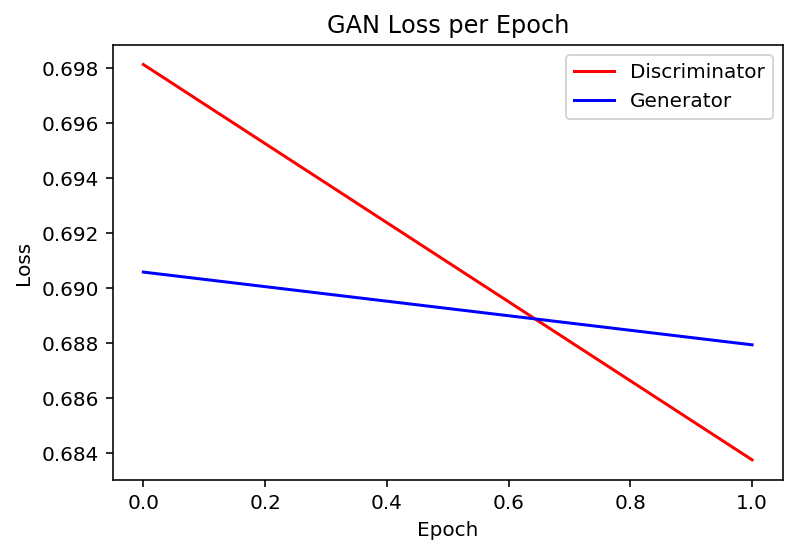

In [53]:
#originally GAN.def plot_loss(self):
self = gan
plt.plot(self.disc_loss, c='red')
plt.plot(self.gen_loss, c='blue')
plt.title("GAN Loss per Epoch")
plt.legend(['Discriminator', 'Generator'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('GAN_Loss_per_Epoch_final.png', transparent=True)
#plt.close()

In [ ]:
#not used
def generate_notes(model, network_input, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    start = numpy.random.randint(0, len(network_input)-1)
    
    # Get pitch names and store in a dictionary
    pitchnames = sorted(set(item for item in notes))
    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in range(500):
        prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = numpy.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)
        
        pattern = numpy.append(pattern,index)
        #pattern.append(index)
        pattern = pattern[1:len(pattern)]

    return prediction_output

In [ ]:
#old main method
if __name__ == '__main__':
  gan = GAN(rows=100)    
  gan.train(epochs=2000, batch_size=32, sample_interval=1) #5000
